In [1]:
from utils import load_image, visualize_image

left = load_image('uttower_left.jpg')
right = load_image('uttower_right.jpg')

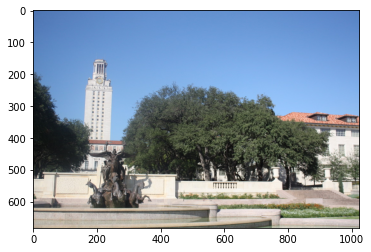

In [2]:
visualize_image(left)

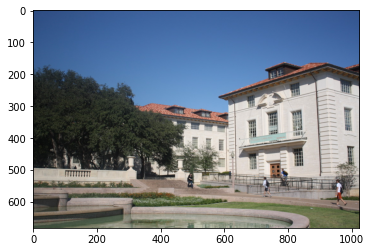

In [3]:
visualize_image(right)

# Feature Detection

In [4]:
from harris import Harris
from feature_detector import FeatureDetector
from utils import visualize_keypoints
from utils import load_keypoints, save_keypoints

In [5]:
harris = Harris(corner_gauss_dim = None)
feature_detector = FeatureDetector(harris)

In [6]:
try:
    left_keypoints = load_keypoints('results/left_keypoints.json')
except:
    print('No saved keypoints found')
    left_keypoints = feature_detector(left, threshold=0.15)
    save_keypoints(left_keypoints, 'results/left_keypoints.json')

No saved keypoints found


In [7]:
try:
    right_keypoints = load_keypoints('results/right_keypoints.json')
except:
    print('No saved keypoints found')
    right_keypoints = feature_detector(right, threshold=0.15)    
    save_keypoints(right_keypoints, 'results/right_keypoints.json')

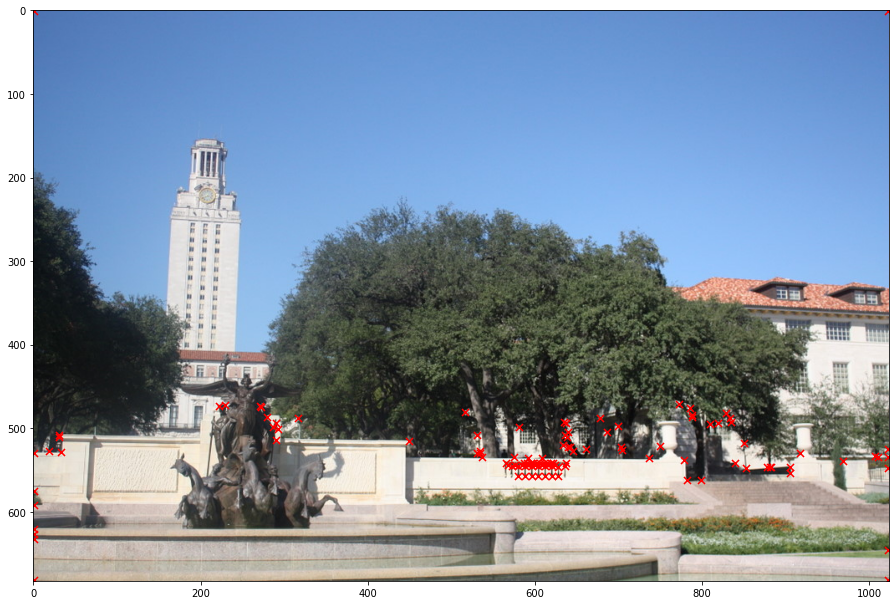

In [8]:
visualize_keypoints(left, left_keypoints)

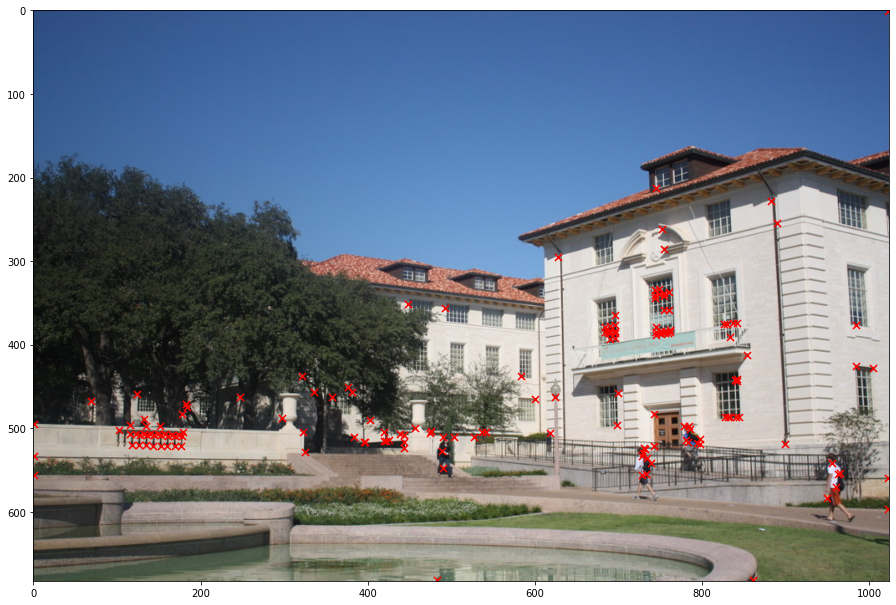

In [9]:
visualize_keypoints(right, right_keypoints)

# Feature Matching

In [10]:
from feature_pairer import FeaturePairer
pairer = FeaturePairer(window_size=21, similarity='ncc')

In [11]:
pairs = pairer(left, left_keypoints, right, right_keypoints)

### Top 20 Pairs

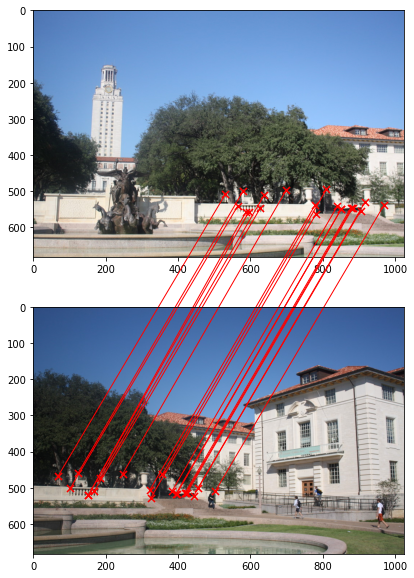

In [12]:
from utils import draw_matches
draw_matches(left, right, list(pairs.keys())[:20], set_inches=(10,10))